## Contour Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

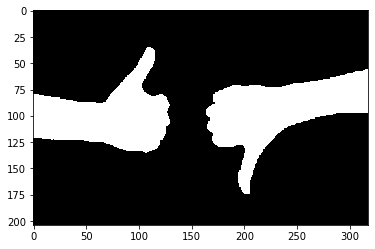

In [29]:
image = cv2.imread("C://Users/subha/Desktop/Computer Vision/hand.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

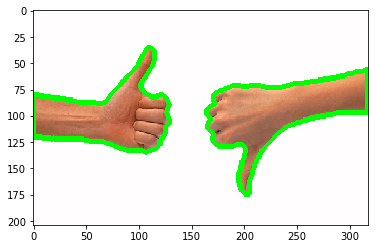

In [30]:
# Find contours from thresholded, binary image
contours,hierachy= cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image)

In [31]:
#Finding the orientation of each contour
def orientations(contours):
    angles = []
    for each in contours:
        (x,y), (MA,ma), angle = cv2.fitEllipse(each)
        angles.append(angle)
        
    return angles

angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [57.38555908203125, 80.50889587402344]


### Cropping Contours

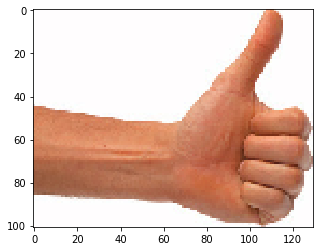

In [36]:
def hand_crop(image, selected_contour):
    # Find the bounding rectangle of a selected contour
    x,y,w,h = cv2.boundingRect(selected_contour)
    # Draw the bounding rectangle as a purple box
    box_image = cv2.rectangle(contours_image, (x,y), (x+w,y+h), (200,0,200),2)
    
    cropped_image = np.copy(image)
    # Crop using the dimensions of the bounding rectangle (x, y, w, h)
    cropped_image = cropped_image[y: y + h, x: x + w] 
    return cropped_image


countour_num=1
selected_contour = contours[countour_num]
if(selected_contour is not None):
    cropped_image = hand_crop(image, selected_contour)
    plt.imshow(cropped_image)